In [1]:
from torchvision import models
import prediction
import visualizer
import torch
import train
import model
import numpy as np
import csvLoader as cl
import visualizer as vs
import dataLoader as dl
import torch.nn as nn
from torch.utils.data.sampler import SubsetRandomSampler, SequentialSampler

In [2]:
model_path = './best_model.pt'
TRAIN_CSV_PATH = 'facial-keypoints-detection/training/training.csv'
TEST_CSV_PATH = 'facial-keypoints-detection/test/test.csv'

In [3]:
test_csv = cl.load_csv(TEST_CSV_PATH)
csv_allValid, csv_autoFill, csv_missingOnly = cl.clean_csv(test_csv)

test_dataset = dl.FacialKptsDataSet(csv_autoFill)
test_sampler =  SubsetRandomSampler(range(len(test_dataset)))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8, sampler=test_sampler)

In [19]:
resnet50 = models.resnet50(num_classes=30)
resnet50.inplanes = 96
resnet50.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3,
                               bias=False)

model= prediction.loadModel(model_path, resnet50)

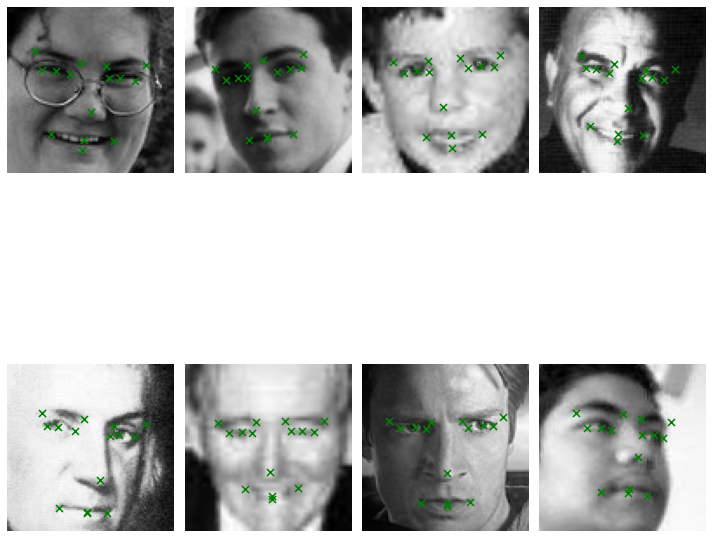

tensor([[64.7654, 40.6711, 27.7442, 36.2707, 58.3334, 40.5786, 73.3222, 42.2605,
         35.8675, 38.1992, 19.7503, 35.9759, 56.4543, 33.4261, 79.5249, 33.2227,
         42.3070, 31.8277, 15.4796, 24.9111, 48.0308, 60.1199, 60.8957, 76.7028,
         24.8863, 72.4462, 43.9687, 75.9537, 42.8721, 81.7963],
        [60.1594, 35.1356, 30.1012, 40.2305, 52.8595, 37.0407, 66.4012, 34.6517,
         35.5781, 40.1775, 23.3896, 41.7285, 44.5789, 29.8494, 67.6876, 26.3240,
         35.4052, 32.7081, 16.9815, 35.4552, 40.5381, 59.1134, 61.7812, 72.8613,
         36.6031, 76.3608, 46.9395, 74.3232, 47.3502, 75.2359],
        [68.2459, 33.4300, 31.5357, 36.2085, 60.7900, 34.8969, 75.4759, 33.8396,
         38.4462, 37.0122, 23.7635, 37.6972, 56.0779, 28.6283, 79.2145, 27.0574,
         37.9251, 30.5295, 17.6826, 31.3977, 46.3901, 57.3517, 68.5970, 72.9883,
         36.4910, 74.2089, 50.8674, 73.3560, 51.6992, 80.7271],
        [64.5478, 39.9727, 32.5713, 35.2099, 58.6538, 40.4224, 71.2508, 41.4618

In [21]:
image, _ = next(iter(test_loader))
prediction.predict(model, image, None)

In [ ]:
TRAIN_CSV_PATH = 'facial-keypoints-detection/training/training.csv'
TEST_CSV_PATH = 'facial-keypoints-detection/test/test.csv'

USE_GPU, device = train.check_GPU()
print('GPU mode: {}'.format(USE_GPU))

train_csv = cl.load_csv(TRAIN_CSV_PATH)

print(f'Len of train csv: {len(np.array(train_csv.Image))}')
csv_allValidTrain, csv_autoFillTrain, _ = cl.clean_csv(train_csv)

print('Loading Dataset...')
train_dataset = dl.FacialKptsDataSet(csv_autoFillTrain)

_, autoFillVal = dl.getTrainValidationDataSet(csv_autoFillTrain, 0.85)
print('Loading validation set...')
val_dataset = dl.FacialKptsDataSet(autoFillVal)

# Init sampler and loader
val_sampler = SubsetRandomSampler(range(len(val_dataset)))
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=8, sampler=val_sampler)

GPU mode: True
Len of train csv: 7049
Loading Dataset...


In [ ]:
image, kpts = next(iter(val_loader))
prediction.predict(model, image, kpts)

In [ ]:
# All Valid
_, allValidVal = dl.getTrainValidationDataSet(csv_allValidTrain, 0.85)
print('Loading validation set...')
val_allValid_dataset = dl.FacialKptsDataSet(allValidVal)

# Init sampler and loader
val_allValid_sampler = SubsetRandomSampler(range(len(val_allValid_dataset)))
val_allValid_loader = torch.utils.data.DataLoader(val_allValid_dataset, batch_size=8, sampler=val_allValid_sampler)

In [ ]:
image, kpts = next(iter(val_allValid_loader))
prediction.predict(model, image, kpts)